# MULTICLASS CLASSIFICATION

This notebook test deep_learn package for multiclass classification using digits dataset from sklearn.

**Import deep_learn package**

In [1]:
try:
    from deep_learn.nn import ann
    print("Imported deep_learn from enviroment site package")
except:
    from config import *
    append_path('../')
    from deep_learn.nn import ann
    print("Imported deep_learn by appending the path of the package to system path")

Imported deep_learn from enviroment site package


**Import neccessary packages**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

## 1. Load and reshape data

**Load digits data**

In [3]:
digits = load_digits()

In [4]:
digits.images.shape

(1797, 8, 8)

**Flatten the 2D image data**

In [5]:
n_samples = len(digits.images)
image = digits.images.reshape((n_samples, -1))
image.shape

(1797, 64)

**Features and output of the data**

In [6]:
features = ["pixel"+str(i+1) for i in range(image.shape[1])]
output = 'label'

**Store the data in a pandas dataframe**

In [7]:
data = pd.DataFrame(image, columns=features)
data[output] = pd.Series(digits.target)
data.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


## 2. Preprocess the data for deep learning model

**Do a train test split**

In [8]:
train_data, test_data = train_test_split(data, test_size = 0.25, random_state = 0)

**A function to extract feature matrix and output vector**

In [9]:
def get_xy_data(dataframe, features = None, output = None):

    '''a function for parsing the feature matrix and output array from a pandas dataframe'''

    # to ignore pandas warning
    import warnings
    warnings.filterwarnings('ignore')

    # import numpy
    import numpy as np

    # if no featues are given then just return the a numpy matrix of the dataframe
    if features == None:
        return dataframe.as_matrix()

    # extract the feature matrix and convert it to numpy array
    X = dataframe[features].as_matrix()

    # if there is no output
    if output == None:
        return X
    # if the output vector is wanted by the user
    else:
        # extracting the output columns and converting it to numpy array
        y = dataframe[output].as_matrix()
        y = np.reshape(y, (-1,1))
        # returning the feature matrix and output vector
        return (X, y)

**Extract X y data for train and test set**

In [10]:
X_train, Y_train = get_xy_data(train_data, features=features, output=output)
X_test, Y_test = get_xy_data(test_data, features=features, output=output)

**Onehot encoding the y data**

In [11]:
encoder = OneHotEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_train = Y_train.toarray()
Y_test = encoder.transform(Y_test)
Y_test = Y_test.toarray()

In [12]:
print(X_train.shape)
print(Y_train.shape)

(1347, 64)
(1347, 10)


In [13]:
print(X_test.shape)
print(Y_test.shape)

(450, 64)
(450, 10)


## 3. Train Neural Neural Network model

**Neural network architecture**

In [14]:
layers_dims = [64,128,128,128,64,10]

**Create a nn model object**

In [15]:
model = ann(layers_dims=layers_dims)

**Hyperparameters of the model**

In [16]:
batch_size = 600
learning_rate = 0.1
num_iterations = 10000

**Fit the model**

In [17]:
model.fit(X_train, Y_train, X_test, Y_test, batch_size,
          learning_rate = learning_rate, 
          num_iterations = num_iterations, print_cost=True, random_seed = 0)

Log loss after iteration 0: 2.342183
Log loss after iteration 100: 2.302380
Log loss after iteration 200: 2.298306
Log loss after iteration 300: 2.294394
Log loss after iteration 400: 2.290679
Log loss after iteration 500: 2.278809
Log loss after iteration 600: 2.267473
Log loss after iteration 700: 2.239826
Log loss after iteration 800: 2.189348
Log loss after iteration 900: 2.006525
Log loss after iteration 1000: 1.768385
Log loss after iteration 1100: 1.599938
Log loss after iteration 1200: 1.442198
Log loss after iteration 1300: 1.245677
Log loss after iteration 1400: 1.091772
Log loss after iteration 1500: 0.930177
Log loss after iteration 1600: 0.839772
Log loss after iteration 1700: 0.733480
Log loss after iteration 1800: 0.643083
Log loss after iteration 1900: 0.494862
Log loss after iteration 2000: 0.409149
Log loss after iteration 2100: 0.322247
Log loss after iteration 2200: 0.251846
Log loss after iteration 2300: 0.197612
Log loss after iteration 2400: 0.160145
Log loss aft

**Plot of Cost vs Iteration**

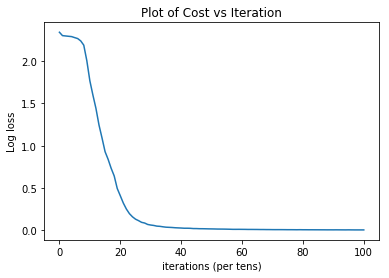

In [18]:
plt.plot(np.squeeze(model.costs))
plt.ylabel('Log loss')
plt.xlabel('iterations (per tens)')
plt.title("Plot of Cost vs Iteration")
plt.show()